# 1. NetCDF files

Network common data form (NetCDF) is commonly used to store multidimensional geographic data. Some examples of these data are temperature, precipitation, and wind speed. Variables stored in NetCDF are often measured multiple times per day over large (continental) areas. With multiple measurements per day, data values accumulate quickly and become unwieldy to work with. When each value is also assigned to a geographic location, data management is further complicated. NetCDF provides a solution for these challenges. 


#### Processing NetCDF Files

The **Climate Data Operator (CDO)** is a command line tool, which can be easily downloaded and installed from the [ISIMIP](https://www.isimip.org/protocol/preparing-simulation-files/cdo-help/) (*Inter-Sectoral Impact Model Intercomparison Project*). CDO is a collection of command line operators to manipulate and analyse Climate and NWP model Data. You can find a documentation of all the commands [here](https://duncanjg.wordpress.com/wp-content/uploads/2008/02/cdo_refcard.pdf).

## 1. How to read NetCDF files to Python

I recommend the following ressources on NetCDF processing in Python provided by [towardsdatescience](https://towardsdatascience.com/read-netcdf-data-with-python-901f7ff61648) and the [NOAA](https://www.star.nesdis.noaa.gov/atmospheric-composition-training/python_netcdf4.php).

For getting to know netDCDF file format, we will now use the [netCDF4 Python library](http://unidata.github.io/netcdf4-python/). It automatically performs a number of data processing actions when opening a netCDF4 data file. Later on, we will read the netCDF files with [xarray Python library](https://docs.xarray.dev/en/stable/). xarray is the most common and easiest way of processing netCDF and similiar data formats in Python.

### 1.1. Installation

The easiest way to get going is to install via `pip install xarray` and `pip install netCDF4` (or if you use the conda package manager `conda install -c conda-forge xarray` in the terminals command line).

Lets import all needed libraries first ...

In [1]:
#  First, lets import all needed libraries
from scipy.io import netcdf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import netCDF4, h5netcdf
import xarray as xr

... and set the working directory:

In [2]:
import os, sys
import wget 


pwd = os.getcwd()
print(pwd)

/Users/marie-christineckert/Nextcloud/TU/Lehre/AktuelleAnwendungen_SoSe24/7_GW_Model_Example


#### Set filepath and read .nc file

In [3]:
## download nc file from online ressource

url = 'https://opendata.dwd.de/climate_environment/CDC/grids_germany/daily/hyras_de/air_temperature_mean/tas_hyras_5_1981_v5-0_de.nc'
download_dir = "data"
wget.download(url, download_dir)

100% [......................................................] 5423029 / 5423029

'data/tas_hyras_5_1981_v5-0_de (1).nc'

In [4]:
# Replace 'your_file.nc' with the path to your NetCDF file
file_path = 'data/tas_hyras_5_1981_v5-0_de.nc'
# Read the NetCDF file into an xarray Dataset
nc = xr.open_dataset(file_path, engine='netcdf4')

### 1.2.  Whats the structure of netCDF4?

>**Exercise**:
>
> * In which variable/ attribute are the coordinates stored in?
> * What is the temporal resolution of our data set?
> * What is the spatial reosultion of the netCDF Grid?
> * How is the metadata stored?
> * Recall python dictionaries? How to access keys and data?

In [5]:
nc

<xarray.Dataset>
Dimensions:             (time: 365, bnds: 2, y: 220, x: 240)
Coordinates:
  * time                (time) datetime64[ns] 1981-01-01T12:00:00 ... 1981-12...
    lon                 (y, x) float64 ...
    lat                 (y, x) float64 ...
  * x                   (x) float32 3.502e+06 3.508e+06 ... 4.692e+06 4.698e+06
  * y                   (y) float32 2.102e+06 2.108e+06 ... 3.192e+06 3.198e+06
Dimensions without coordinates: bnds
Data variables:
    time_bnds           (time, bnds) datetime64[ns] ...
    x_bnds              (x, bnds) float32 ...
    y_bnds              (y, bnds) float32 ...
    crs_HYRAS           int32 ...
    tas                 (time, y, x) float32 ...
    number_of_stations  (time) float64 ...
Attributes: (12/19)
    source:                 surface observations
    Conventions:            CF-1.8
    realization:            v5.0
    project_id:             HYRAS
    input_data_status:      non-realtime
    level_type:             surface
    ...                     ...
    horizontal_resolution:  5 km
    institution:            Deutscher Wetterdienst (DWD)
    title:                  gridded_temperature_dataset_(HYRAS-DE TAS)
    creation_date:          created at 2022-12-04 00:36:38
    filename:               tas_hyras_5_1981_v5-0_de.nc
    unique_dataset_id:      DWD_HYRAS_DE_tas_v5.0_1981_day_00638BEB96

#### solution

* in the x,y variable
* daily data
* 5km grid
* click on 'Attributes'

## 2. Exploring NetCDF files

### 2.1.  Extraction of required variables from the netcdf file

First, lets get an overview of all variables stored in the file:

In [6]:
nc.variables.keys()

KeysView(Frozen({'time': <xarray.IndexVariable 'time' (time: 365)>
array(['1981-01-01T12:00:00.000000000', '1981-01-02T12:00:00.000000000',
       '1981-01-03T12:00:00.000000000', ..., '1981-12-29T12:00:00.000000000',
       '1981-12-30T12:00:00.000000000', '1981-12-31T12:00:00.000000000'],
      dtype='datetime64[ns]')
Attributes:
    standard_name:  time
    long_name:      Mid Of Twentyfour Hour Time Interval [UTC]
    bounds:         time_bnds
    axis:           T, 'time_bnds': <xarray.Variable (time: 365, bnds: 2)>
[730 values with dtype=datetime64[ns]], 'lon': <xarray.Variable (y: 220, x: 240)>
[52800 values with dtype=float64]
Attributes:
    standard_name:        longitude
    long_name:            Longitude Of Cell Center
    units:                degrees_east
    _CoordinateAxisType:  Lon, 'lat': <xarray.Variable (y: 220, x: 240)>
[52800 values with dtype=float64]
Attributes:
    standard_name:        latitude
    long_name:            Latitude Of Cell Center
    units:     

Access one variable at a time:

In [7]:
var1 = nc.variables['number_of_stations']  # access a variable in the file
var1

<xarray.Variable (time: 365)>
[365 values with dtype=float64]
Attributes:
    long_name:  Number Of Stations Available For Interpolation Per Day All Ov...

Access variables as vectors in order to produces time series:

In [8]:
## Extract variables as needed to make TS
tas = nc.variables['tas'][:] # mean temp
times = nc.variables['time'][:]
lat = nc.variables['x'][:] # lat
lon = nc.variables['y'][:]

len(nc.variables['x'][:])


# Close the dataset when done
nc.close()

> **Exercise**:
> 
> Read in temperature data stored in the `tas` attribute to a new variable and print min and max temperature for that given year. 


#### solution

In [9]:
tas = nc.variables['tas'][:]
tas

<xarray.Variable (time: 365, y: 220, x: 240)>
[19272000 values with dtype=float32]
Attributes:
    standard_name:      air_temperature
    long_name:          Daily Mean Air Temperature
    units:              Celsius
    grid_mapping:       crs_HYRAS
    cell_methods:       time: mean
    CoordinateSystems:  LatLonCoordinateSystem ProjectionCoordinateSystem
    esri_pe_string:     PROJCS["ETRS_1989_LCC",GEOGCS["GCS_ETRS_1989",DATUM["...

In [10]:

# Print max and min of FRP array to check data range
print('The maximum Temp value is', np.max(tas), nc.variables['tas'].attrs['units'])
print('The minimum Temp value is', np.min(tas), nc.variables['tas'].attrs['units'])

The maximum Temp value is <xarray.Variable ()>
array(26.20000076) Celsius
The minimum Temp value is <xarray.Variable ()>
array(-18.60000038) Celsius


### 2.2. Mapping & Coordinate Reference Systems (CRS)

A **CRS** tells Python how those coordinates relate to places on the Earth.
For reference codes of the most commonly used projections, see [here](https://spatialreference.org).

crs are commonly encoded as **EPSG Codes**. An EPSG code is a unique identifier used to represent coordinate systems and other geodetic properties like datums, spheroids, and units. EPSG stands for European Petroleum Survey Group and is a scientific organization that maintains a geodetic parameter database with standard codes.

We can access the coordinate system information and the projection with following command: 

In [11]:
nc.crs_HYRAS.attrs

{'grid_mapping_name': 'lambert_conformal_conic',
 'long_name': 'DWD HYRAS ETRS89 LCC grid with 240 columns and 220 rows',
 'standard_parallel': array([35., 65.]),
 'longitude_of_central_meridian': 10.0,
 'latitude_of_projection_origin': 52.0,
 'semi_major_axis': 6378137.0,
 'semi_minor_axis': 6356752.31424518,
 'inverse_flattening': 298.2572235630102,
 'false_easting': 4000000.0,
 'false_northing': 2800000.0,
 'scale_factor_at_projection_origin': 0.017453292519943295,
 'proj4': '+proj=lcc +lat_1=35 +lat_2=65 +lat_0=52 +lon_0=10 +x_0=4000000 +y_0=2800000 +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs',
 'proj4_params': '+proj=lcc +lat_1=35 +lat_2=65 +lat_0=52 +lon_0=10 +x_0=4000000 +y_0=2800000 +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs',
 'epsg_code': 'EPSG:3034',
 'crs_wkt': 'PROJCS["ETRS_1989_LCC",GEOGCS["GCS_ETRS_1989",DATUM["D_ETRS_1989",SPHEROID["GRS_1980",6378137.0,298.257222101]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]],PROJECTION["Lambert_Con

In [12]:
# flip the data in latitude so North Hemisphere is up on the plot
temp = nc.variables['tas'][0,::,:]
print('shape=%s, type=%s' % \
 (temp.shape, type(temp)))

shape=(220, 240), type=<class 'xarray.core.variable.Variable'>


We can easily plot our spatial distributon of the temperature (`tas`) using `matplotlib`, since the data is stored in an easily processabale array-like shape. 

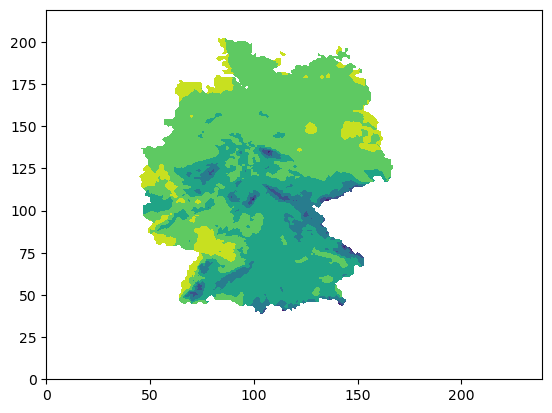

In [13]:

import matplotlib.pyplot as plt

plt.contourf(temp)
plt.show()

**Note, on more thing with the Lat/lons in the .nc files:**

You might noticed it already: the lats/lons are in 2D but the x/y coordinates are not?

2D Longitude and Latitude coordinates occur when the grid lines do not follow lines of constant latitude and longitude. So any projected grid, rotated grid, or curvilinear grid, even if in geographic coordinates, will have 2D longitude and latitude coordinate variables. Python packages such as Xarray can deal with those. We will use xarray in the upcoming script ([helpful thread](https://gis.stackexchange.com/questions/378861/strange-netcdf-file-with-lat-long-as-2d-dimensions)).

You won't be able to use some of the nice tools to slice along 2D coordinates. To extract data from a grid location nearest to a specified lon,lat point, for example, you need to write your own code, [like provided here]( https://stackoverflow.com/questions/58758480/xarray-select-nearest-lat-lon-with-multi-dimension-coordinates). but thankfully the HYRAS data also comes with 1D x,y-coordinates! No further processing needed as we will just use those!

### 2.3. Dealing with Dates and Times

The time variables are usually measured relative to a fixed date using a certain calendar. The specified units are like *hours since `YY:MM:DD hh:mm:ss`*.

In [14]:
#from netCDF4 import num2date, date2num, date2index
time = nc.variables["time"] # time dim name
print('name of time dimension = %s' % time)

name of time dimension = <xarray.IndexVariable 'time' (time: 365)>
array(['1981-01-01T12:00:00.000000000', '1981-01-02T12:00:00.000000000',
       '1981-01-03T12:00:00.000000000', ..., '1981-12-29T12:00:00.000000000',
       '1981-12-30T12:00:00.000000000', '1981-12-31T12:00:00.000000000'],
      dtype='datetime64[ns]')
Attributes:
    standard_name:  time
    long_name:      Mid Of Twentyfour Hour Time Interval [UTC]
    bounds:         time_bnds
    axis:           T


`dtype='datetime64[ns]'`indicates that we already dealing with datetime here. Perfect! no further conversion needed!

If you want to lern more about date time conversions in Python see [**SOGA**](https://www.geo.fu-berlin.de/en/v/soga-py/Advanced-statistics/time-series-analysis/Dates-times-and-time-series-in-Python/index.html). 

In this tutorial we learned how to deal with netCDF files in Python and how to read its metadata.

### Perfect! You are now ready for the next script :)